<a href="https://colab.research.google.com/github/shanaka-desoysa/notes/blob/main/docs/Finance/Calculate_Composite_Rate_for_Series_I_Bonds_Latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculate Composite Rate for Series I Savings Bonds (I Bonds) using CPI




## Install Packages

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader.fred import FredReader

## Download CPI Data from FRED

Download Consumer Price Index for All Urban Consumers - Not Seasonaly Adjusted [CPIAUCNS](https://fred.stlouisfed.org/series/CPIAUCNS).

In [2]:
end_date = pd.to_datetime('today').date()
start_date = (end_date + pd.DateOffset(years=-5)).date()

print(f'start_date: {start_date} to end_date: {end_date}')

start_date: 2017-08-11 to end_date: 2022-08-11


In [3]:
df = FredReader('CPIAUCNS', start=start_date).read()

In [4]:
df.tail(12)

,CPIAUCNS
DATE,
2021-08-01,273.567
2021-09-01,274.310
2021-10-01,276.589
2021-11-01,277.948
2021-12-01,278.802
2022-01-01,281.148
2022-02-01,283.716
2022-03-01,287.504
2022-04-01,289.109


## Plot CPI Data

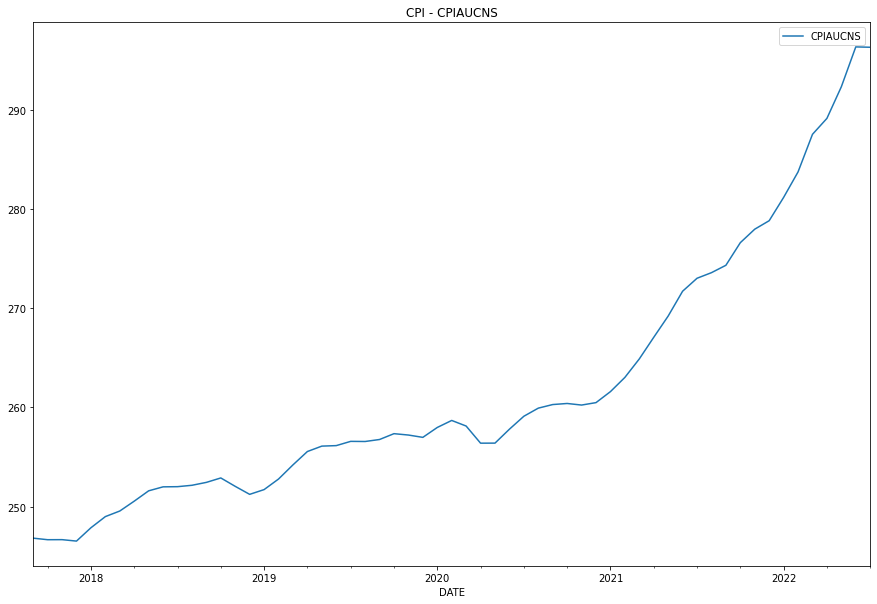

In [5]:
df.plot(title='CPI - CPIAUCNS', figsize=(15,10));

## Calculate Percent Change

In [6]:
df['CPIAUCNS-1m'] = df['CPIAUCNS'].shift(periods=1)
df['CPIAUCNS-6m'] = df['CPIAUCNS'].shift(periods=6)
df['CPIAUCNS-12m'] = df['CPIAUCNS'].shift(periods=12)
df.tail(12)

,CPIAUCNS,CPIAUCNS-1m,CPIAUCNS-6m,CPIAUCNS-12m
DATE,,,,
2021-08-01,273.567,273.003,263.014,259.918
2021-09-01,274.310,273.567,264.877,260.280
2021-10-01,276.589,274.310,267.054,260.388
2021-11-01,277.948,276.589,269.195,260.229
2021-12-01,278.802,277.948,271.696,260.474
2022-01-01,281.148,278.802,273.003,261.582
2022-02-01,283.716,281.148,273.567,263.014
2022-03-01,287.504,283.716,274.310,264.877
2022-04-01,289.109,287.504,276.589,267.054


Composite Rate is 6 months percentage change multiplied by 2 (annualized).

In [7]:
df['percent_change_1m'] = (df['CPIAUCNS'] - df['CPIAUCNS-1m'])*100 / df['CPIAUCNS-1m']
df['percent_change_6m'] = (df['CPIAUCNS'] - df['CPIAUCNS-6m'])*100 / df['CPIAUCNS-6m']
df['percent_change_12m'] = (df['CPIAUCNS'] - df['CPIAUCNS-12m'])*100 / df['CPIAUCNS-12m']

# Composite Rate
df['percent_change_6m_annualized'] = df['percent_change_6m'] *2
cols = ['percent_change_1m', 'percent_change_6m', 'percent_change_12m', 'percent_change_6m_annualized']
df[cols].tail(12)

,percent_change_1m,percent_change_6m,percent_change_12m,percent_change_6m_annualized
DATE,,,,
2021-08-01,0.206591,4.012334,5.251272,8.024668
2021-09-01,0.271597,3.561276,5.390349,7.122551
2021-10-01,0.830812,3.570439,6.221869,7.140878
2021-11-01,0.491343,3.251546,6.809003,6.503093
2021-12-01,0.307252,2.615423,7.036403,5.230846
2022-01-01,0.841457,2.983484,7.479872,5.966967
2022-02-01,0.913398,3.709877,7.871064,7.419755
2022-03-01,1.335138,4.809887,8.542456,9.619773
2022-04-01,0.558253,4.526572,8.258629,9.053144


## Composite Rate
Following we can see the composite rate based on the latest CPI data.

In [8]:
composite_rate = df.iloc[-1]['percent_change_6m_annualized'].round(2)
inflation_rate = df.iloc[-1]['percent_change_12m'].round(2)
latest_CPI_date = df.iloc[-1].name.date()

print(f'Latest CPI Date: {latest_CPI_date}, Inflation Rate: {inflation_rate}%, Composite Rate: {composite_rate}%')

Latest CPI Date: 2022-07-01, Inflation Rate: 8.52%, Composite Rate: 10.76%


## Plot Percent Changes over Time

In [9]:
# pct_columns = ['percent_change_1m', 'percent_change_6m', 'percent_change_12m', 'percent_change_6m_annualized']
pct_columns = ['percent_change_6m_annualized']

In [10]:
df[pct_columns].tail(12)

,percent_change_6m_annualized
DATE,
2021-08-01,8.024668
2021-09-01,7.122551
2021-10-01,7.140878
2021-11-01,6.503093
2021-12-01,5.230846
2022-01-01,5.966967
2022-02-01,7.419755
2022-03-01,9.619773
2022-04-01,9.053144


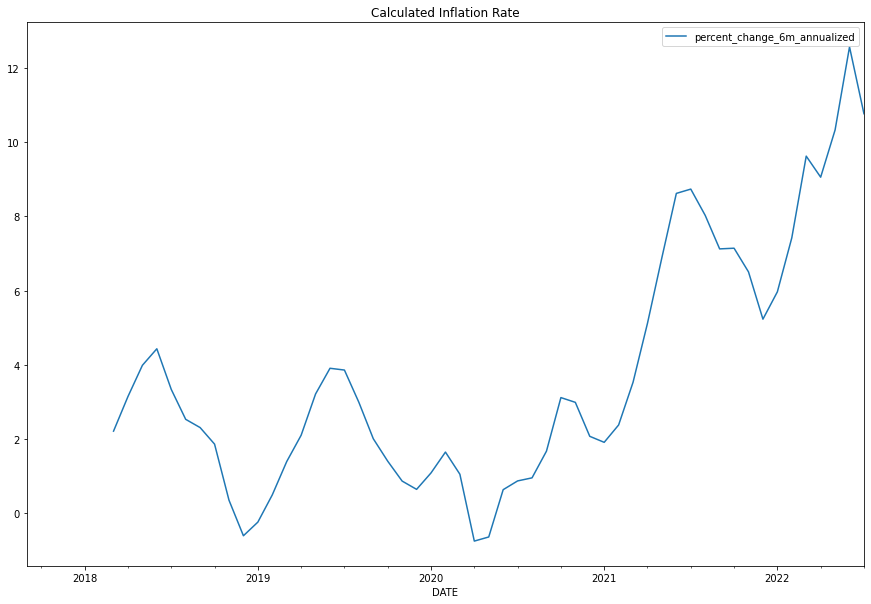

In [11]:
df[pct_columns].plot(title='Calculated Inflation Rate', figsize=(15, 10));

In [12]:
print(f"Last Updated {pd.to_datetime('today')}")

Last Updated 2022-08-11 12:03:35.659083
